In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Please input the Trade ID: trade10
Please input the Confidence Level: (A number between 0.00 and 100) 95


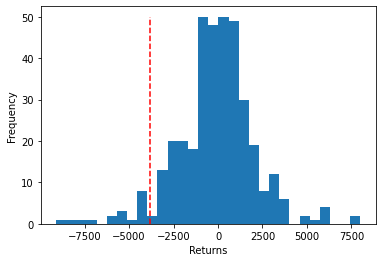

The VaR for this trade is: -3853.23


In [3]:
# Trade-level Value at Risk Calculation
dataframe = pd.read_csv('/content/Portfolio.csv')

def CalculateVaRByTrade(tradeId, conf_level):
  for val in dataframe.values: 
    if val[0] == tradeId:
      returns = val[1].split(';')
      # Use map to iterate the returns one by one using float function
      # map is memory effective in comparison to for loop (only one item is stored in the memory at a time)
      # Turn map object into a list
      returns = list(map(float, returns))
      returns.sort()
      plt.hist(returns, bins=30)
      plt.xlabel('Returns')
      plt.ylabel('Frequency')
      returns = pd.DataFrame(returns)
      VaR = returns.quantile(1 - conf_level)
      plt.vlines(VaR[0], 0, 50, linestyles='dashed', color='red')
      plt.show()
      return round(VaR[0], 2)
  return False
  
tradeId = input('Please input the Trade ID: ')
conf_level = input('Please input the Confidence Level: (A number between 0.00 and 100) ')

try:
  conf_level = float(conf_level)
except ValueError:
  print('Error: The inserted Confidence Level value is not a number')

if conf_level >= 0 and conf_level <= 100:
  conf_level = conf_level / 100
else: 
  raise Exception('Error: The inserted Confidence Level value is not between 0 and 100')


TradeVaR = CalculateVaRByTrade(tradeId, conf_level)
if TradeVaR:
  print('The VaR for this trade is:' , TradeVaR)
else: 
  raise Exception('Error: The Trade ID you inserted does not exist.')



Please input the Confidence Level: (A number between 0.00 and 100) 95


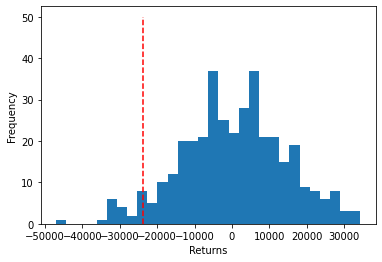

The VaR for this portfolio is: -23803.91


In [4]:
# Portfolio-level Value at Risk Calculation
def CalculateVaRByPortfolio(conf_level):
  VaR_portfolio = float()
  VaR_dict = dict()
  for i in range(len(dataframe.values)): 
    returns = dataframe.values[i][1].split(';')
    returns = list(map(float, returns))
    if i == 0:
      VaR_dict = returns
    else:
      for j in range(len(returns)):
        VaR_dict[j] += returns[j]
  
  VaR_dict.sort() 
  plt.hist(VaR_dict, bins=30)
  plt.xlabel('Returns')
  plt.ylabel('Frequency')
      
  returns = pd.DataFrame(VaR_dict) 
  VaR = returns.quantile(1 - conf_level)
  
  VaR_portfolio += VaR[0] 
  plt.vlines(VaR_portfolio, 0, 50, linestyles='dashed', color='red')
  plt.show()
  return round(VaR_portfolio, 2)


conf_level = input('Please input the Confidence Level: (A number between 0.00 and 100) ')

try:
  conf_level = float(conf_level)
except ValueError:
  print('Error: The inserted Confidence Level value is not a number')

if conf_level >= 0 and conf_level <= 100:
  conf_level = conf_level / 100
else: 
  raise Exception('Error: The inserted Confidence Level value is not between 0.00 and 100')

PortfolioVaR = CalculateVaRByPortfolio(conf_level)
print('The VaR for this portfolio is:' , PortfolioVaR)
